In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('group5_dataset.csv')


In [14]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('Kyphosis',axis=1)

In [21]:
y = df['Kyphosis']

In [22]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
predictions = dtree.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.74      0.82      0.78        17
     present       0.50      0.38      0.43         8

    accuracy                           0.68        25
   macro avg       0.62      0.60      0.60        25
weighted avg       0.66      0.68      0.67        25



In [29]:
print(confusion_matrix(y_test,predictions))  

[[14  3]
 [ 5  3]]


In [30]:
from IPython.display import Image  

In [31]:
from sklearn.externals.six import StringIO 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [32]:
from sklearn.tree import export_graphviz

In [33]:
import pydot

In [34]:
features = list(df.columns[1:])

In [35]:
dot_data = StringIO() 

In [36]:
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [37]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

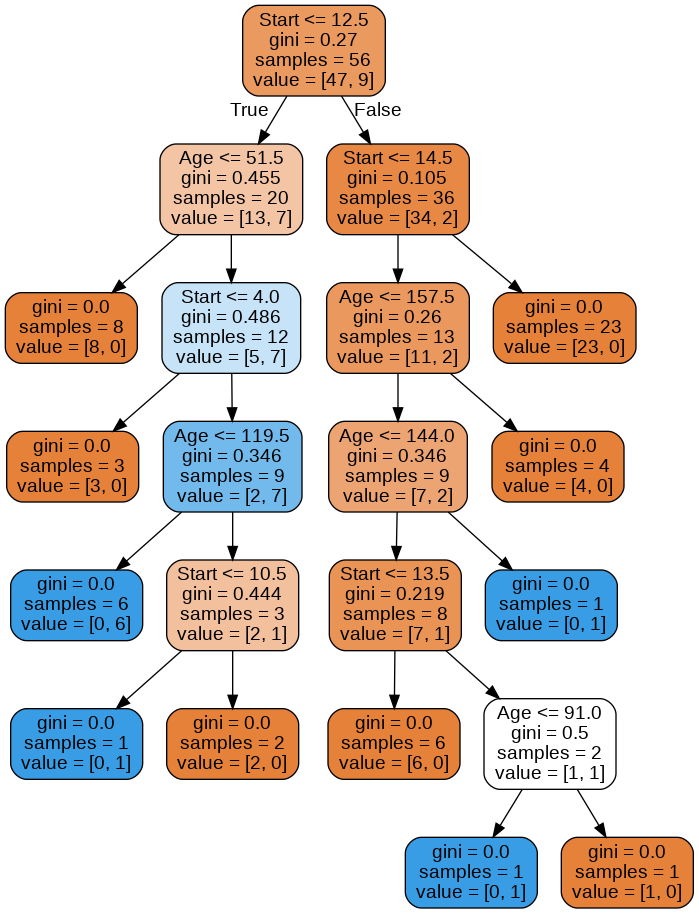

In [38]:
Image(graph[0].create_png())